## Set Up

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib

from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

gdp_data = pd.read_csv('./GDP.csv')
gdp_data= gdp_data.fillna(method = "bfill")
gdp_capita_data = pd.read_csv('./GDP_capita.csv')
gdp_capita_data = gdp_capita_data.fillna(method = "bfill")
rsf_freedom_data = pd.read_csv('./rsf_data.csv')
rsf_freedom_data = rsf_freedom_data.fillna(method = "bfill")


gdp_capita_codes = gdp_capita_data["Country Code"].tolist()
gdp_codes = gdp_data["Country Code"].tolist()
final_gdp_data = pd.DataFrame()

for c in gdp_capita_codes:
    if c in gdp_codes:
        temp = gdp_data[gdp_data["Country Code"] == c]
        frames = [final_gdp_data, temp]
        final_gdp_data = pd.concat(frames)
final_gdp_data = final_gdp_data.merge(gdp_capita_data, on = 'Country Code')

In [43]:
rsf_codes = rsf_freedom_data["Country Code"].tolist()
final = pd.DataFrame()

for c in gdp_capita_codes:
    if c in rsf_codes:
        temp = rsf_freedom_data[rsf_freedom_data["Country Code"] == c]
        frames = [final, temp]
        final = pd.concat(frames)
final = final.drop(['FR_Country', 'EN_country', 'ES_country', 'Zone'], axis=1)
real_final = final_gdp_data.merge(final, on = 'Country Code')

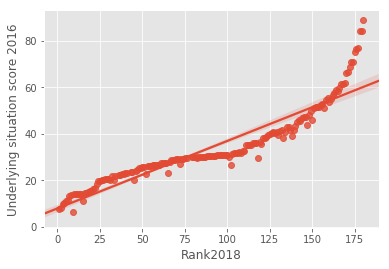

In [38]:
sns.regplot(x="Rank2018", y="Underlying situation score 2016" , data=real_final)

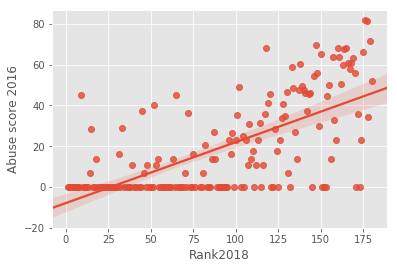

In [39]:
sns.regplot(x="Rank2018", y="Abuse score 2016" , data=real_final)

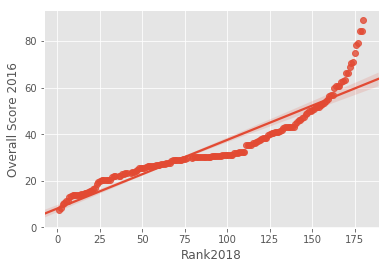

In [40]:
sns.regplot(x="Rank2018", y="Overall Score 2016" , data=real_final)

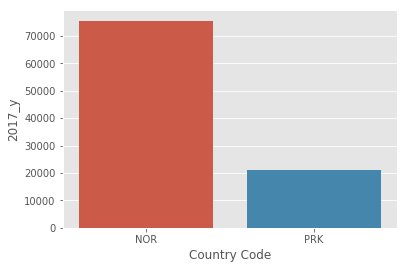

In [45]:
norway = real_final[real_final['Country Code'] == 'NOR']
north_korea = real_final[real_final['Country Code'] == 'PRK']
l = [norway, north_korea]
data = pd.concat(l)
data

sns.barplot(x="Country Code", y="2017_y", data=data)

In [48]:
real_final

,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2015_y,2016_y,2017_y,Rank2018,Underlying situation score 2016,Abuse score 2016,Overall Score 2016,Progression RANK,Rank 2017,Score 2017
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,569.577923,561.778746,585.850064,118,29.53,68.3,37.28,2,120,39.46
1,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,3683.552607,3308.772828,4170.312280,121,38.35,0.0,38.35,4,125,40.42
2,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,3952.830781,4131.872341,4537.862492,75,29.49,16.1,29.49,1,76,29.92
3,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,36038.267600,37231.815670,39146.548840,37,22.21,0.0,22.21,-2,35,21.03
4,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,39122.049710,38517.800390,40698.849340,128,40.37,40.8,40.86,-9,119,39.39
5,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,13698.293440,12654.355000,14401.974850,52,22.54,40.1,26.05,-2,50,25.07
6,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,3617.935746,3605.743117,3936.798320,80,29.99,0.0,29.99,-1,79,30.38
7,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,2.593124e+10,...,56561.412380,49896.681100,53799.938090,19,15.46,0.0,15.46,0,19,16.02
8,Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,2.593124e+10,...,44206.784280,44731.010860,47290.911650,11,14.04,0.0,14.04,0,11,13.47
9,Azerbaijan,AZE,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,2.593124e+10,...,5500.310382,3880.738731,4131.618310,163,57.81,59.6,59.73,-1,162,56.40


In [ ]:
real_final.to_csv('./final.csv')